In [15]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing
from graphviz import Digraph
from sklearn.metrics import r2_score

 Normal distribution -- eclipse 
 Exponential distribution -- diamond


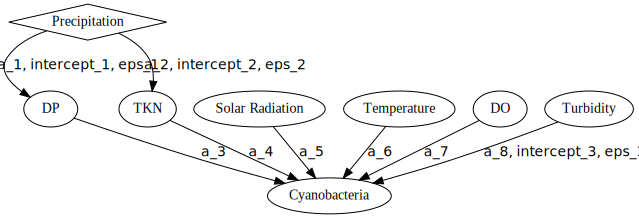

In [16]:
print(" Normal distribution -- eclipse \n Exponential distribution -- diamond" )
dot = Digraph(comment='A simple Graph')
dot.node('A', 'Precipitation', shape='diamond')
dot.node('B', 'DP')
dot.node('C', 'TKN')
dot.node('D', 'Solar Radiation')
dot.node('E', 'Temperature')
dot.node('F', 'DO')
dot.node('G', 'Turbidity')
dot.node('H', 'Cyanobacteria')
dot.edge("A", "B", label="a_1, intercept_1, eps_1", fontname="Calibri")
dot.edge("A", "C", label="a_2, intercept_2, eps_2", fontname="Calibri")
dot.edge("B", "H", label="a_3", fontname="Calibri")
dot.edge("C", "H", label="a_4", fontname="Calibri")
dot.edge("D", "H", label="a_5", fontname="Calibri")
dot.edge("E", "H", label="a_6", fontname="Calibri")
dot.edge("F", "H", label="a_7", fontname="Calibri")
dot.edge("G", "H", label="a_8, intercept_3, eps_3", fontname="Calibri")
dot.format = 'png'
#dot.edges(['AB', 'AC','BH','CH','DH','EH','FH','GH'])
dot.render('graph1', view=False) 
dot

 Normal distribution -- eclipse 
 Exponential distribution -- diamond


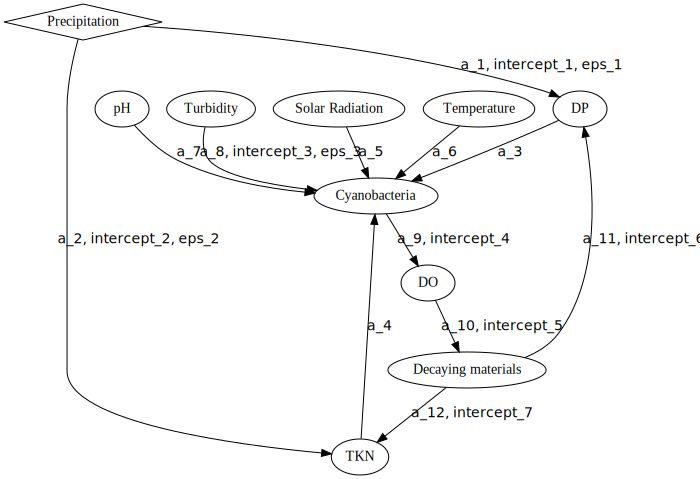

In [17]:
print(" Normal distribution -- eclipse \n Exponential distribution -- diamond" )
dot = Digraph(comment='A simple Graph')
dot.node('A', 'Precipitation', shape='diamond')
dot.node('B', 'DP')
dot.node('C', 'TKN')
dot.node('D', 'Solar Radiation')
dot.node('E', 'Temperature')
dot.node('F', 'pH')
dot.node('G', 'Turbidity')
dot.node('H', 'Cyanobacteria')
dot.node('I','DO')
dot.node('J','Decaying materials')
dot.edge("A", "B", label="a_1, intercept_1, eps_1", fontname="Calibri")
dot.edge("A", "C", label="a_2, intercept_2, eps_2", fontname="Calibri")
dot.edge("B", "H", label="a_3", fontname="Calibri")
dot.edge("C", "H", label="a_4", fontname="Calibri")
dot.edge("D", "H", label="a_5", fontname="Calibri")
dot.edge("E", "H", label="a_6", fontname="Calibri")
dot.edge("F", "H", label="a_7", fontname="Calibri")
dot.edge("G", "H", label="a_8, intercept_3, eps_3", fontname="Calibri")
dot.edge("H", "I", label="a_9, intercept_4",fontname="Calibri")
dot.edge("I", "J", label="a_10, intercept_5",fontname="Calibri")
dot.edge("J", "B", label="a_11, intercept_6", fontname="Calibri")
dot.edge("J", "C", label="a_12, intercept_7", fontname="Calibri")
dot.format = 'png'
#dot.edges(['AB', 'AC','BH','CH','DH','EH','FH','GH'])
dot.render('graph2', view=False) 
dot

In [18]:
#Gaussian Linear Bayesian Network

In [19]:
df=pd.read_csv("cyano_train.csv")
df=df.rename(columns={"PRECTOT": "prec", "ALLSKY_SFC_SW_DWN": "solar"})
df.head()

,Unnamed: 0,prec,solar,Date,pH,DP,TKN,DO,Turb,Temp,Cyano
0,0,0.02,27.20,2010-06-17,8.25,0.090,0.424,6.75,16.5,24.8,166
1,1,0.00,11.20,2013-01-23,8.66,0.015,0.556,13.13,3.6,2.1,24537
2,2,0.00,11.01,2013-01-15,8.66,0.015,0.496,13.24,4.0,1.0,32993
3,3,0.84,29.70,2006-07-13,8.39,0.103,0.861,7.65,10.5,25.4,3509
4,4,1.32,23.14,2009-08-05,8.13,0.080,0.591,5.77,14.5,25.1,5542


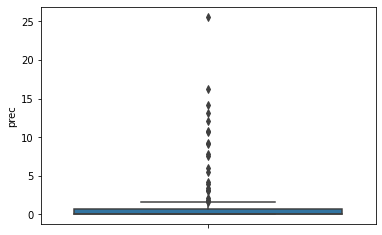

In [20]:
#boxplot and exclude outliers using z-score
df_prec = pd.DataFrame(df['prec'])
sns.boxplot(y='prec', data=df)
df_prec['z_score']=stats.zscore(df_prec['prec'])
df_prec=df_prec.loc[df_prec['z_score'].abs()<=3]

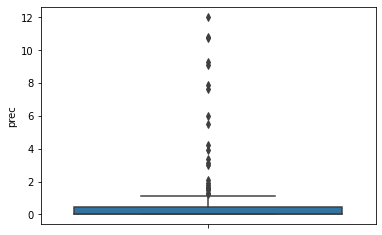

In [21]:
#boxplot after removing the outliers
sns.boxplot(y='prec', data=df_prec)

([<matplotlib.axis.YTick at 0x7faafdd98dc0>],
 <a list of 1 Text major ticklabel objects>)

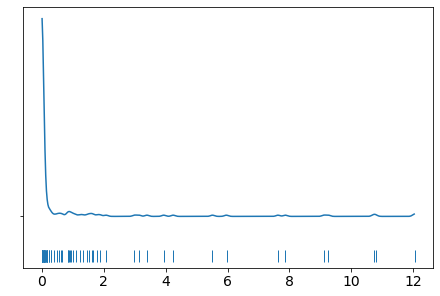

In [22]:
#kde plot
az.plot_kde(df_prec['prec'].values, rug=True)
plt.yticks([0], alpha=0)

/opt/anaconda3/lib/python3.8/site-packages/pymc3/distributions/continuous.py:138: UserWarning: The variable specified for lam has negative support for Exponential, likely making it unsuitable for this parameter.
  warnings.warn(msg)
<ipython-input-23-b6cbf922395a>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_prec = pm.sample(1000, tune=1000, cores=3)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [lambda_1]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 21 seconds.
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faae0e71b80>,
      dtype=object)

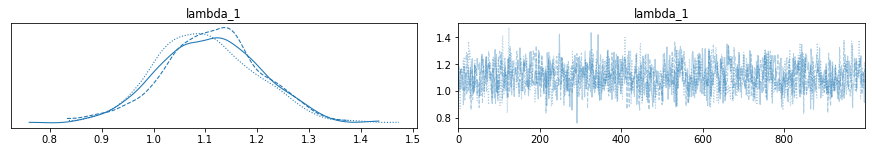

In [23]:
#Build the model of precipitation
with pm.Model() as model_prec:
    lambda_1 = pm.Normal("lambda_1", mu = 3, sd=1)
    precipitation = pm.Exponential("precipitation", lam=lambda_1, observed = df_prec['prec'])
with model_prec:
    trace_prec = pm.sample(1000, tune=1000, cores=3)
az.plot_trace(trace_prec)

In [24]:
prec=az.summary(trace_prec)
prec

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda_1,1.108,0.095,0.945,1.298,0.003,0.002,1348.0,2106.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-25-0186b6c0be65>:5: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_prec, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.4033394082167105\nGelman-Rubin = 1.0018518074537395')

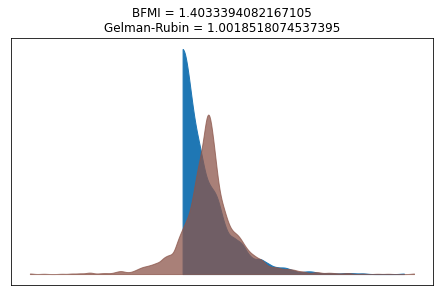

In [25]:
#evaluation metrics to see if NUTS sampler converged.
bfmi = np.max(pm.stats.bfmi(trace_prec))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_prec).values()).values
(
    pm.energyplot(trace_prec, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)
#bfmi:Bayesian fraction of missing information,
#Reference:https://arxiv.org/pdf/1604.00695.pdf
#"in the worst case BFMI → 0 and the momentum resampling induces very slow exploration across the level sets, while in the best case BFMI → 1 and the momentum resampling effectively generates exact draws from the marginal energy distribution."

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


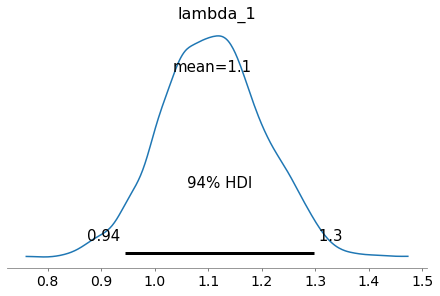

In [26]:
#HDP intervals
az.plot_posterior(trace_prec)

([<matplotlib.axis.YTick at 0x7faae0b72850>],
 <a list of 1 Text major ticklabel objects>)

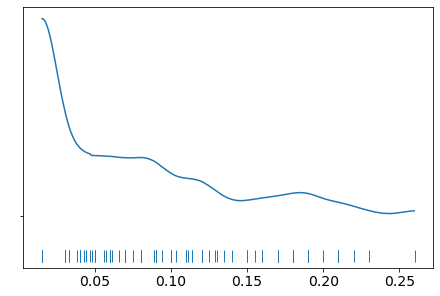

In [27]:
#DP
az.plot_kde(df['DP'].values, rug=True)
plt.yticks([0], alpha=0)

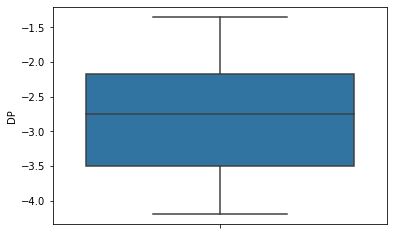

In [28]:
#boxplot and log transform
df_dp = pd.DataFrame(df['DP'])
df_dp['DP']=df_dp['DP'].apply(np.log)
sns.boxplot(y='DP', data=df_dp)
#do not need to remove outliers

([<matplotlib.axis.YTick at 0x7faafead05e0>],
 <a list of 1 Text major ticklabel objects>)

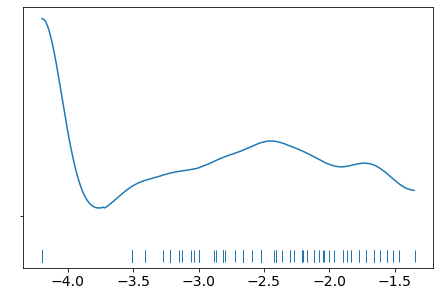

In [29]:
#replot distribution
az.plot_kde(df_dp['DP'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-30-0a10f4fb4ac0>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_dp = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps_1, intercept_1, a_1]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
<ipython-input-30-0a10f4fb4ac0>:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_dp, var_names=['a_1', 'intercept_1', 'eps_1'])


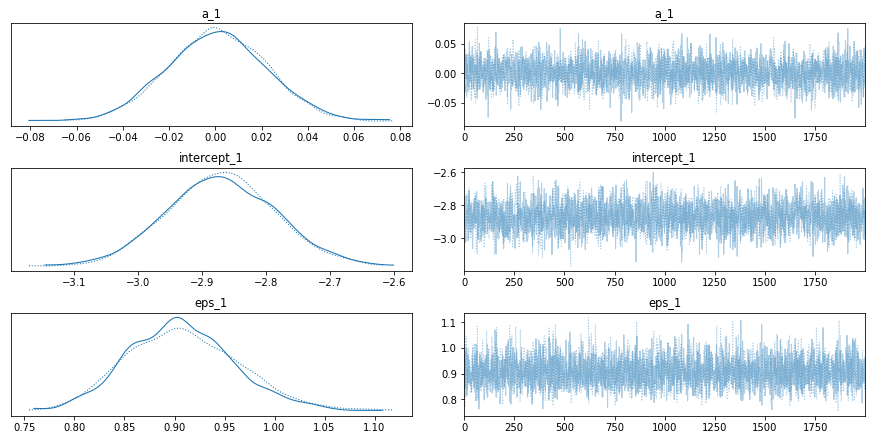

In [30]:
#Build the model for DP
with pm.Model() as model_dp:
    #model of parameters
    a_1 = pm.Normal("a_1", mu=0, sd=1)
    intercept_1 = pm.Normal("intercept_1", mu=0, sd=1)
    eps_1 = pm.HalfCauchy('eps_1', 5.)
    #deterministic model
    mu_1 = pm.Deterministic("mu_1", a_1*df['prec']+intercept_1)
    #likelihood
    dp=pm.Normal("dp", mu=mu_1, sd=eps_1, observed = df_dp['DP'])
    trace_dp = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_dp, var_names=['a_1', 'intercept_1', 'eps_1'])

In [31]:
dp = az.summary(trace_dp).head(3)
dp

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_1,0.001,0.021,-0.037,0.043,0.000,0.000,2835.0,2590.0,1.0
intercept_1,-2.870,0.084,-3.028,-2.713,0.002,0.001,2979.0,2749.0,1.0
eps_1,0.908,0.055,0.811,1.016,0.001,0.001,4263.0,3019.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-32-d4ab20b80960>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_dp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.1583118616091603\nGelman-Rubin = 1.0021677413369283')

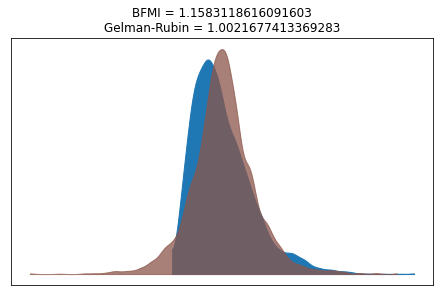

In [32]:
bfmi = np.max(pm.stats.bfmi(trace_dp))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_dp).values()).values
(
    pm.energyplot(trace_dp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

([<matplotlib.axis.YTick at 0x7faae152cbe0>],
 <a list of 1 Text major ticklabel objects>)

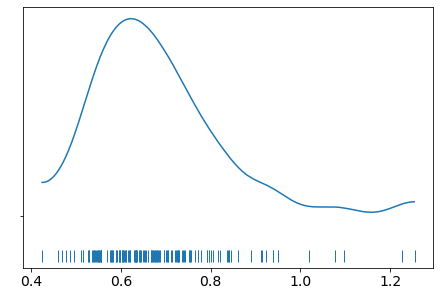

In [33]:
#TKN
az.plot_kde(df['TKN'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-34-e0113389456f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkn['TKN']=df_tkn['TKN'].apply(np.log)


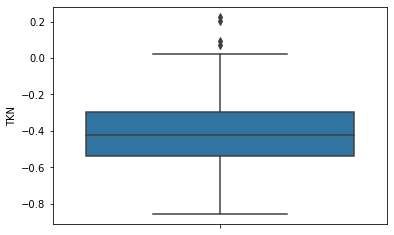

In [34]:
#boxplot and log transform
df_tkn = df[['prec','TKN']]
df_tkn['TKN']=df_tkn['TKN'].apply(np.log)
sns.boxplot(y='TKN', data=df_tkn)

<ipython-input-35-e5e2c7d0ed9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tkn['z_score']=stats.zscore(df_tkn['TKN'])


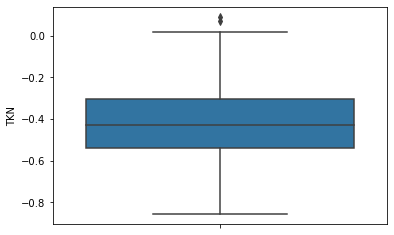

In [35]:
#re-boxplot
df_tkn['z_score']=stats.zscore(df_tkn['TKN'])
df_tkn=df_tkn.loc[df_tkn['z_score'].abs()<=3]
sns.boxplot(y='TKN', data=df_tkn)

([<matplotlib.axis.YTick at 0x7faae0bf3df0>],
 <a list of 1 Text major ticklabel objects>)

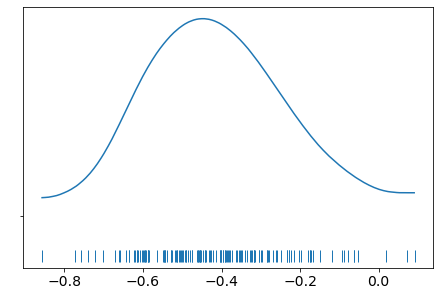

In [36]:
#replot log
az.plot_kde(df_tkn['TKN'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-37-fc3e3ed8f6e1>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_tkn = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps_2, intercept_2, a_2]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
<ipython-input-37-fc3e3ed8f6e1>:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_tkn, var_names=['a_2', 'intercept_2', 'eps_2'])


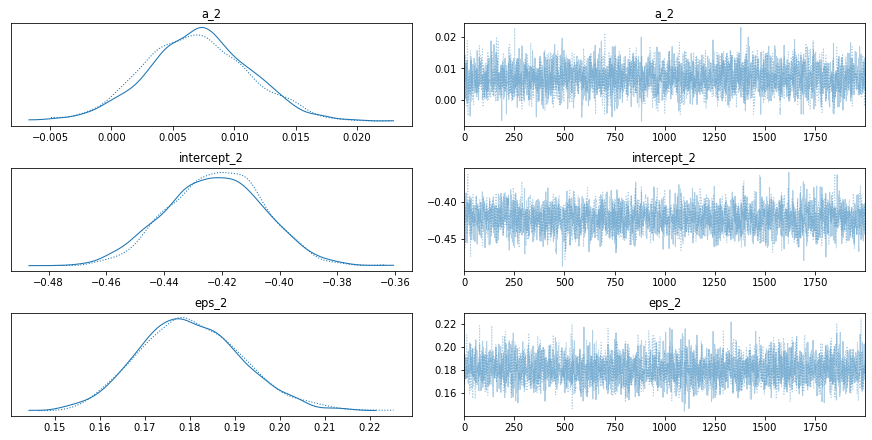

In [37]:
#Build the model for TKN
with pm.Model() as model_tkn:
    #model of parameters
    a_2 = pm.Normal("a_2", mu=0, sd=1)
    intercept_2 = pm.Normal("intercept_2", mu=0, sd=1)
    eps_2 = pm.HalfCauchy('eps_2', 5.)
    #deterministic model  
    mu_2 = pm.Deterministic("mu_2", a_2*df_tkn['prec']+intercept_2)
    #likelihood
    tkn=pm.Normal("tkn", mu=mu_2, sd=eps_2, observed = df_tkn['TKN'])
    trace_tkn = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_tkn, var_names=['a_2', 'intercept_2', 'eps_2'])

In [38]:
tkn = az.summary(trace_tkn).head(3)
tkn

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_2,0.007,0.004,-0.000,0.015,0.0,0.0,3084.0,2765.0,1.0
intercept_2,-0.422,0.017,-0.453,-0.392,0.0,0.0,2485.0,2906.0,1.0
eps_2,0.180,0.011,0.160,0.202,0.0,0.0,3553.0,2930.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-39-d0e210bf9ad1>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_tkn, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.1752172379009551\nGelman-Rubin = 1.0009650250639472')

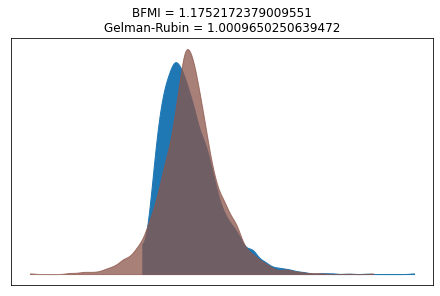

In [39]:
bfmi = np.max(pm.stats.bfmi(trace_tkn))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_tkn).values()).values
(
    pm.energyplot(trace_tkn, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

([<matplotlib.axis.YTick at 0x7faae11a8ac0>],
 <a list of 1 Text major ticklabel objects>)

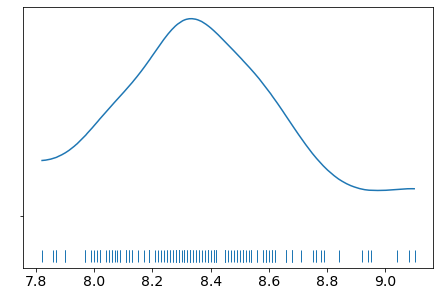

In [40]:
#DO
az.plot_kde(df['pH'].values, rug=True)
plt.yticks([0], alpha=0)

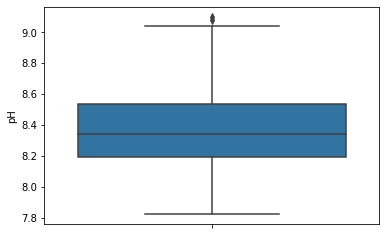

In [41]:
sns.boxplot(y='pH', data=df)

<ipython-input-42-f7477367aa55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ph['ph']=df_ph['pH'].apply(np.log)


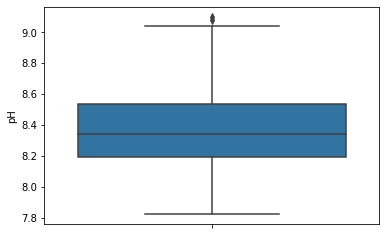

In [42]:
df_ph = df[['pH']]
df_ph['ph']=df_ph['pH'].apply(np.log)
sns.boxplot(y='pH', data=df_ph)

([<matplotlib.axis.YTick at 0x7faafeb7a6a0>],
 <a list of 1 Text major ticklabel objects>)

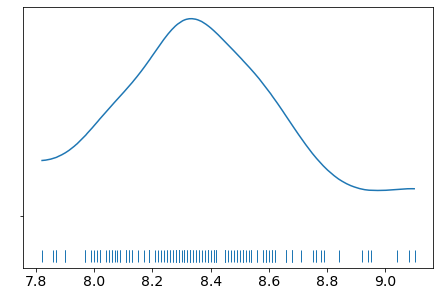

In [43]:
az.plot_kde(df_ph['pH'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-44-1a8fbdb22db0>:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_ph = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_3, mu_3]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
<ipython-input-44-1a8fbdb22db0>:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_ph, var_names=['mu_3', 'sigma_3'])


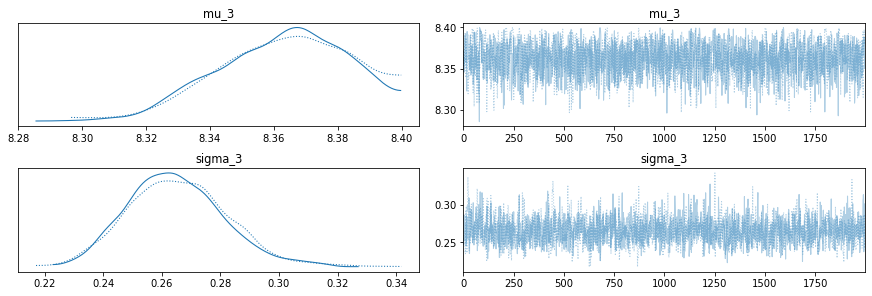

In [44]:
#Build the model for pH
with pm.Model() as model_ph:
    #model of parameters
    mu_3 = pm.Uniform("mu_3", lower=8.2, upper=8.4)
    sigma_3 = pm.HalfNormal('sigma_3', sd=1)
    #likelihood
    ph=pm.Normal("ph", mu=mu_3, sd=sigma_3, observed = df_ph['pH'])
    trace_ph = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_ph, var_names=['mu_3', 'sigma_3'])

In [45]:
ph=az.summary(trace_ph)
ph

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_3,8.363,0.020,8.330,8.400,0.0,0.0,1807.0,1115.0,1.0
sigma_3,0.265,0.017,0.234,0.296,0.0,0.0,1915.0,1731.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-46-a0d80ed0a7d6>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_ph, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.0022963170499966\nGelman-Rubin = 1.004298795500558')

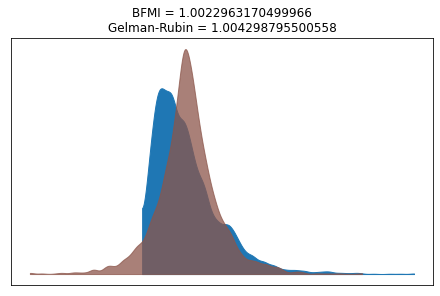

In [46]:
bfmi = np.max(pm.stats.bfmi(trace_ph))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_ph).values()).values
(
    pm.energyplot(trace_ph, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

([<matplotlib.axis.YTick at 0x7faae11ff340>],
 <a list of 1 Text major ticklabel objects>)

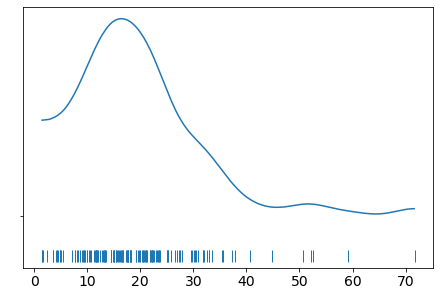

In [47]:
#Turbidity
az.plot_kde(df['Turb'].values, rug=True)
plt.yticks([0], alpha=0)

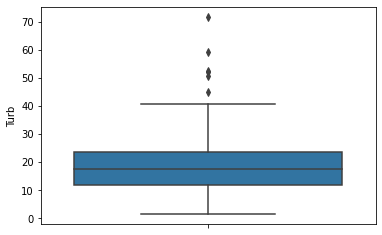

In [48]:
sns.boxplot(y='Turb', data=df)

<ipython-input-49-1ff23af87dde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turb['Turb']=df_turb['Turb'].apply(np.log)
<ipython-input-49-1ff23af87dde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turb['z_score']=stats.zscore(df_turb['Turb'])


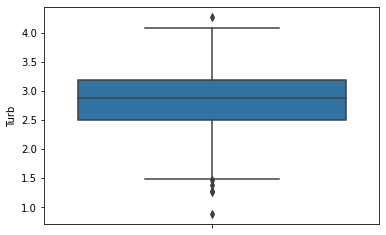

In [49]:
df_turb = df[['Turb']]
df_turb['Turb']=df_turb['Turb'].apply(np.log)
df_turb['z_score']=stats.zscore(df_turb['Turb'])
df_turb=df_turb.loc[df_turb['z_score'].abs()<=3]
sns.boxplot(y='Turb', data=df_turb)

([<matplotlib.axis.YTick at 0x7faae1270880>],
 <a list of 1 Text major ticklabel objects>)

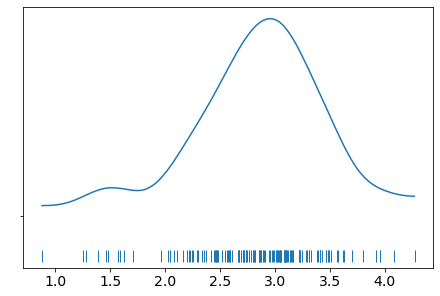

In [50]:
az.plot_kde(df_turb['Turb'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-51-99b20fbb8d44>:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_turb = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_4, mu_4]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.
<ipython-input-51-99b20fbb8d44>:9: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_turb, var_names=['mu_4', 'sigma_4'])


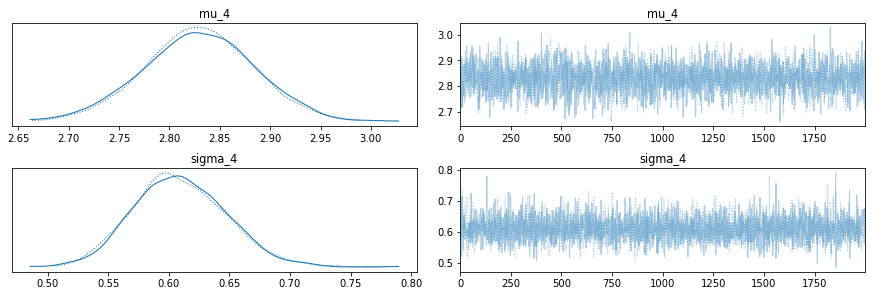

In [51]:
#Build the model for Turbidity
with pm.Model() as model_turb:
    #model of parameters
    mu_4 = pm.Uniform("mu_4", lower=2.5, upper=3.5)
    sigma_4 = pm.HalfNormal('sigma_4', sd=1)
    #likelihood
    turb = pm.Normal("turb", mu=mu_4, sd=sigma_4, observed = df_turb['Turb'])
    trace_turb = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_turb, var_names=['mu_4', 'sigma_4'])

In [52]:
turb=az.summary(trace_turb)
turb

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_4,2.829,0.054,2.730,2.934,0.001,0.001,2510.0,1921.0,1.0
sigma_4,0.609,0.038,0.539,0.681,0.001,0.000,3510.0,2571.0,1.0


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-53-5f9cc50d71a4>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_turb, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.098674398446891\nGelman-Rubin = 1.0033613811445248')

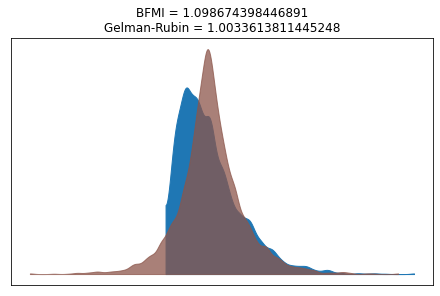

In [53]:
bfmi = np.max(pm.stats.bfmi(trace_turb))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_turb).values()).values
(
    pm.energyplot(trace_turb, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/jointplot.py:144: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faae4ef8490>,
      dtype=object)

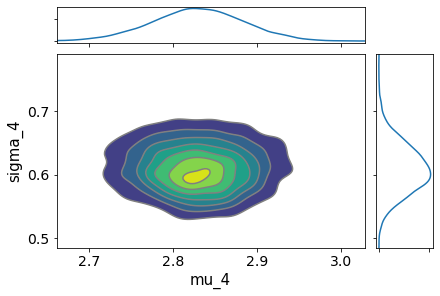

In [54]:
az.plot_joint(trace_turb, kind='kde', fill_last=False)

In [55]:
df_sp = pd.read_csv("solar&prec.csv")
df_sp=df_sp.rename(columns={"PRECTOT": "prec", "ALLSKY_SFC_SW_DWN": "solar"})
df_sp.head()

,LAT,LON,YEAR,MO,DY,prec,solar,Date
0,37.72531,-97.79759,2002,8,7,0.00,22.07,2002-08-07
1,37.72531,-97.79759,2002,8,8,0.18,23.90,2002-08-08
2,37.72531,-97.79759,2002,8,9,4.11,17.39,2002-08-09
3,37.72531,-97.79759,2002,8,10,1.27,11.70,2002-08-10
4,37.72531,-97.79759,2002,8,11,14.62,23.22,2002-08-11


In [56]:
#solar radiation
solar = pd.DataFrame(df_sp[['solar', 'MO']])
solar['z_score']=stats.zscore(solar['solar'])
solar=solar.loc[solar['z_score'].abs()<=3]
summer = solar.loc[(solar['MO'] >3) & (solar['MO']<10)]
winter = solar.loc[(solar['MO'] <4) | (solar['MO']>9)]

([<matplotlib.axis.YTick at 0x7faae55e8e20>],
 <a list of 1 Text major ticklabel objects>)

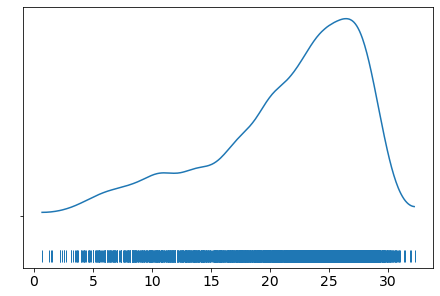

In [57]:
az.plot_kde(summer['solar'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7faae14498b0>],
 <a list of 1 Text major ticklabel objects>)

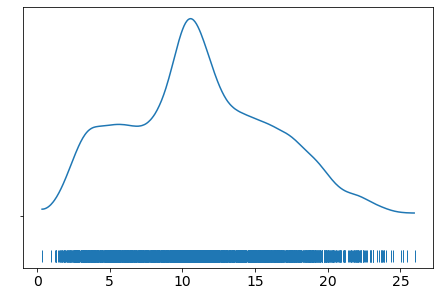

In [58]:
az.plot_kde(winter['solar'].values, rug=True)
plt.yticks([0], alpha=0)

In [59]:
#Mixture model of solar radiation
with pm.Model() as model_solar:
    mu_5 = pm.Uniform('mu_5', lower = 20, upper = 30)
    mu_6 = pm.Uniform('mu_6', lower = 5, upper = 15)
    sigma_5 = pm.HalfNormal('sigma_5', sd=1)
    sigma_6 = pm.HalfNormal('sigma_6', sd=1)
    norm_5 = pm.Normal.dist(mu=mu_5, sd=sigma_5)
    norm_6 = pm.Normal.dist(mu=mu_6, sd=sigma_6)
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    like = pm.Mixture('like', w=w, comp_dists = [norm_5, norm_6], observed=solar['solar'])

<ipython-input-60-e030240ad149>:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_solar = pm.sample(1000, cores=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, sigma_6, sigma_5, mu_6, mu_5]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 36 seconds.
The number of effective samples is smaller than 25% for some parameters.
<ipython-input-60-e030240ad149>:3: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_solar, var_names=['mu_5', 'mu_6','sigma_5','sigma_6','w'])


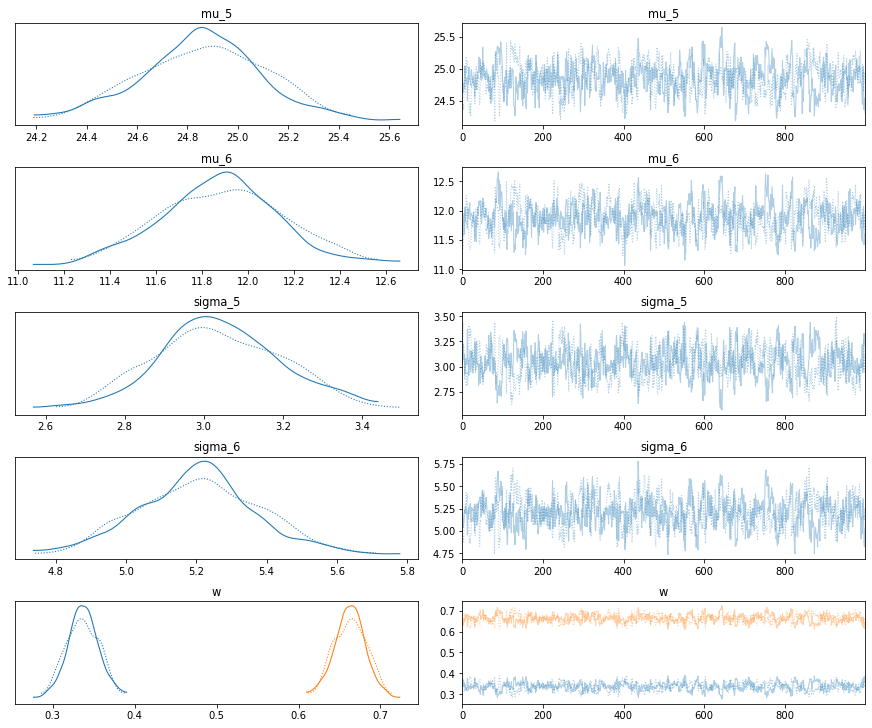

In [60]:
with model_solar:
    trace_solar = pm.sample(1000, cores=1)
    pm.traceplot(trace_solar, var_names=['mu_5', 'mu_6','sigma_5','sigma_6','w'])

In [61]:
solar=az.summary(trace_solar)
solar

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_5,24.856,0.242,24.382,25.285,0.014,0.010,297.0,431.0,1.02
mu_6,11.882,0.261,11.401,12.396,0.015,0.011,303.0,460.0,1.02
sigma_5,3.041,0.158,2.779,3.373,0.009,0.007,292.0,482.0,1.02
sigma_6,5.205,0.168,4.877,5.507,0.009,0.007,322.0,522.0,1.02
w[0],0.337,0.020,0.300,0.374,0.001,0.001,304.0,486.0,1.02
w[1],0.663,0.020,0.626,0.700,0.001,0.001,304.0,486.0,1.02


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-62-12b5b1476b78>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_solar, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.2858293486489356\nGelman-Rubin = 1.0221349678648173')

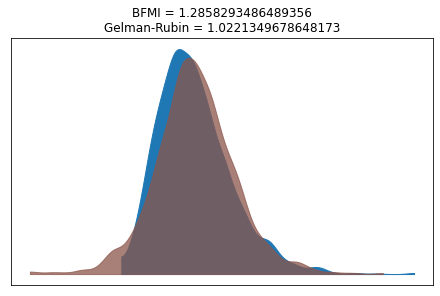

In [62]:
bfmi = np.max(pm.stats.bfmi(trace_solar))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_solar).values()).values
(
    pm.energyplot(trace_solar, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

In [63]:
df_temp = pd.read_csv("temperature.csv")
df_temp=df_temp.rename(columns={"T2M": "temp"})
df_temp.head()

,LAT,LON,YEAR,MO,DY,temp
0,37.72531,-97.79759,2002,8,7,29.45
1,37.72531,-97.79759,2002,8,8,28.69
2,37.72531,-97.79759,2002,8,9,28.01
3,37.72531,-97.79759,2002,8,10,26.11
4,37.72531,-97.79759,2002,8,11,27.20


In [64]:
#Temperature
temp = pd.DataFrame(df_temp[['temp', 'MO']])
temp['z_score']=stats.zscore(temp['temp'])
temp=temp.loc[temp['z_score'].abs()<=3]
summer = temp.loc[(temp['MO'] >3) & (temp['MO']<10)]
winter = temp.loc[(temp['MO'] <4) | (temp['MO']>9)]

([<matplotlib.axis.YTick at 0x7faafe81b3d0>],
 <a list of 1 Text major ticklabel objects>)

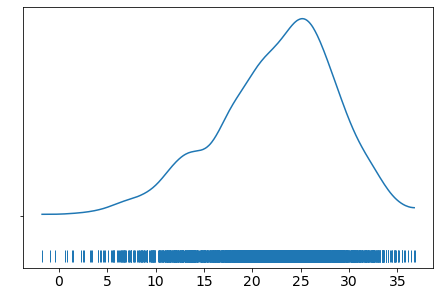

In [65]:
az.plot_kde(summer['temp'].values, rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7faae4f40310>],
 <a list of 1 Text major ticklabel objects>)

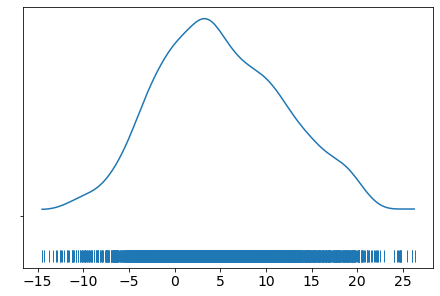

In [66]:
az.plot_kde(winter['temp'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-67-c08614af7d89>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_temp = pm.sample(1000, cores=1)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [w, sigma_8, sigma_7, mu_8, mu_7]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 38 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6720139999678415, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
<ipython-input-67-c08614af7d89>:12: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_temp, var_names=['mu_7', 'mu_8','sigma_7','sigma_8','w'])


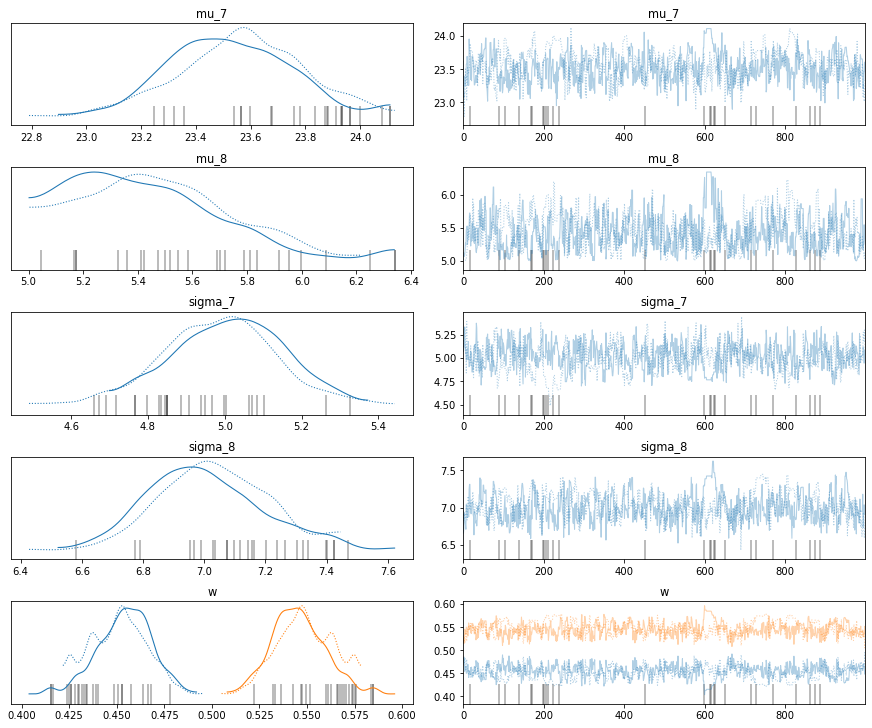

In [67]:
#Mixture model of solar radiation
with pm.Model() as model_temp:
    mu_7 = pm.Uniform('mu_7', lower = 20, upper = 30)
    mu_8 = pm.Uniform('mu_8', lower = 5, upper = 15)
    sigma_7 = pm.HalfNormal('sigma_7', sd=1)
    sigma_8 = pm.HalfNormal('sigma_8', sd=1)
    norm_7 = pm.Normal.dist(mu=mu_7, sd=sigma_7)
    norm_8 = pm.Normal.dist(mu=mu_8, sd=sigma_8)
    w = pm.Dirichlet('w', a=np.array([1, 1]))
    like = pm.Mixture('like', w=w, comp_dists = [norm_7, norm_8], observed=temp['temp'])
    trace_temp = pm.sample(1000, cores=1)
    pm.traceplot(trace_temp, var_names=['mu_7', 'mu_8','sigma_7','sigma_8','w'])

In [68]:
temp=az.summary(trace_temp)
temp

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_7,23.545,0.222,23.136,23.964,0.018,0.013,158.0,164.0,1.01
mu_8,5.444,0.272,5.008,5.916,0.021,0.015,190.0,239.0,1.01
sigma_7,5.000,0.144,4.742,5.278,0.010,0.007,199.0,135.0,1.01
sigma_8,7.018,0.180,6.740,7.424,0.014,0.010,169.0,129.0,1.01
w[0],0.453,0.015,0.424,0.477,0.001,0.001,124.0,92.0,1.01
w[1],0.547,0.015,0.523,0.576,0.001,0.001,124.0,102.0,1.01


/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-69-6acb6d74689d>:4: DeprecationWarning: The function `energyplot` from PyMC3 is just an alias for `plot_energy` from ArviZ. Please switch to `pymc3.plot_energy` or `arviz.plot_energy`.
  pm.energyplot(trace_temp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Text(0.5, 1.0, 'BFMI = 1.0515659970518305\nGelman-Rubin = 1.0130758590762086')

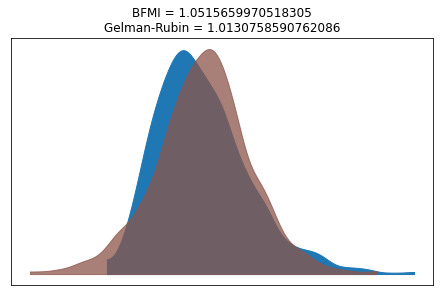

In [69]:
bfmi = np.max(pm.stats.bfmi(trace_temp))
max_gr = max(np.max(gr_stats) for gr_stats in pm.stats.rhat(trace_temp).values()).values
(
    pm.energyplot(trace_temp, legend=False, figsize=(6, 4)).set_title("BFMI = {}\nGelman-Rubin = {}".format(bfmi, max_gr))
)

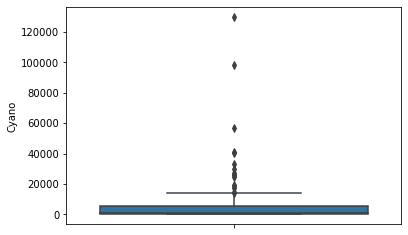

In [70]:
#Cyanobacter
df_cyano = pd.DataFrame(df[['Cyano','DP','TKN','solar','Temp','Turb','pH','DO']])
sns.boxplot(y='Cyano', data=df_cyano)
df_cyano['Cyano']=df_cyano['Cyano'].apply(np.log)
df_cyano['DP']=df_cyano['DP'].apply(np.log)
df_cyano['TKN']=df_cyano['TKN'].apply(np.log)
df_cyano['DO']=df_cyano['pH'].apply(np.log)
df_cyano['Turb']=df_cyano['Turb'].apply(np.log)
df_cyano['z_score']=stats.zscore(df_cyano['Cyano'])
df_cyano=df_cyano.loc[df_cyano['z_score'].abs()<=1.5]

([<matplotlib.axis.YTick at 0x7faad51fd160>],
 <a list of 1 Text major ticklabel objects>)

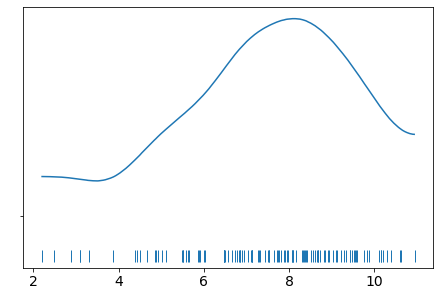

In [71]:
az.plot_kde(df_cyano['Cyano'].values, rug=True)
plt.yticks([0], alpha=0)

<ipython-input-72-ca0602342d84>:22: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_cyano = pm.sample(2000, tune=2000, target_accept=0.9)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps_3, intercept_3, a_8, a_7, a_6, a_5, a_4, a_3]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.
<ipython-input-72-ca0602342d84>:23: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_cyano, var_names=['a_3', 'a_4', 'a_5', 'a_6', 'a_7','a_8','intercept_3', 'eps_3'])


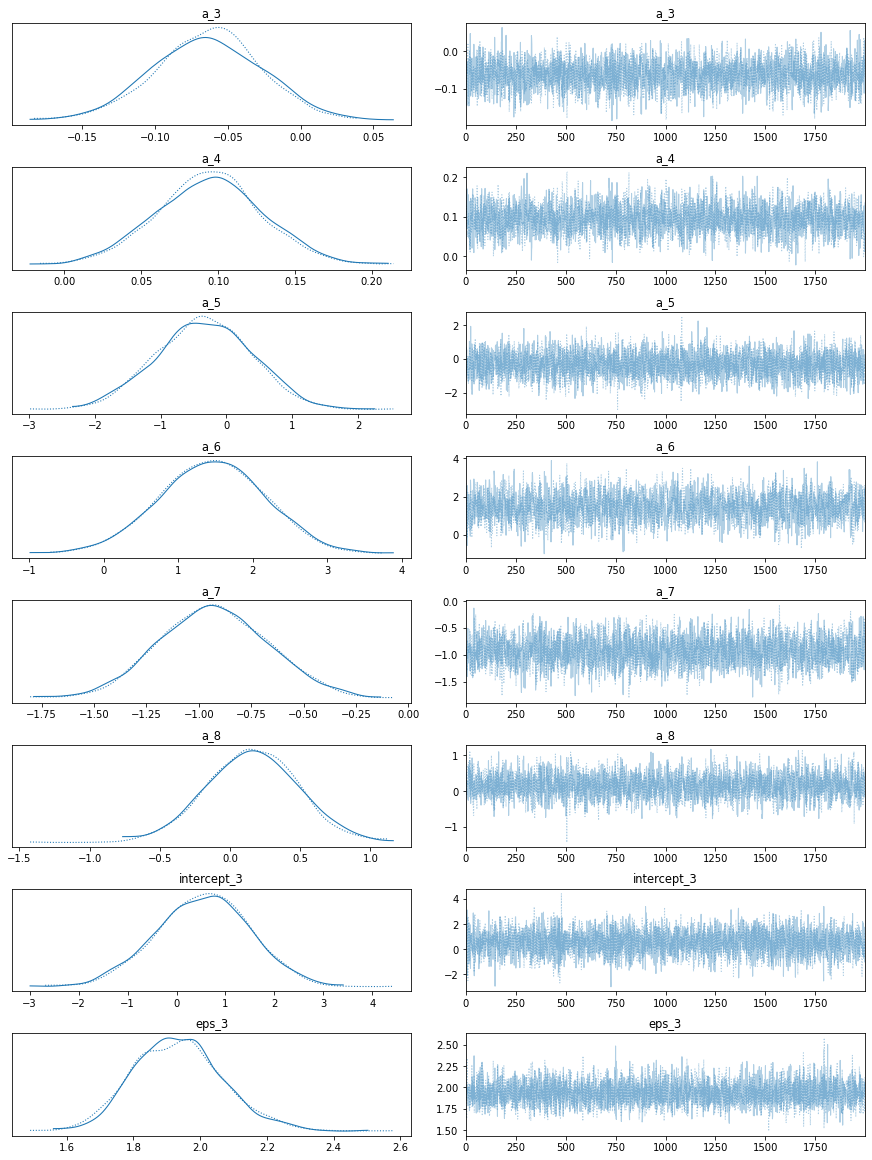

In [72]:
#Build the model for Cyanobacteria abundance
solar_shared=shared(df_cyano['solar'].values)
temp_shared=shared(df_cyano['Temp'].values)
tkn_shared=shared(df_cyano['TKN'].values)
do_shared=shared(df_cyano['DO'].values)
dp_shared=shared(df_cyano['DP'].values)
turb_shared=shared(df_cyano['Turb'].values)
with pm.Model() as model_cyano:
    #model of parameters
    a_3 = pm.Normal("a_3", mu=0, sd=1)
    a_4 = pm.Normal("a_4", mu=0, sd=1)
    a_5 = pm.Normal("a_5", mu=0, sd=1)
    a_6 = pm.Normal("a_6", mu=0, sd=1)
    a_7 = pm.Normal("a_7", mu=0, sd=1)
    a_8 = pm.Normal("a_8", mu=0, sd=1)
    intercept_3 = pm.Normal("intercept_3", mu=0, sd=1)
    eps_3 = pm.HalfCauchy('eps_3', 5.)
    #deterministic model
    mu_9 = pm.Deterministic("mu_9", a_3*solar_shared+a_4*temp_shared+a_5*tkn_shared+a_6*do_shared+a_7*dp_shared+a_8*turb_shared+intercept_3)
    #likelihood
    cyano = pm.Normal("cyano", mu= mu_9, sd=eps_3, observed = df_cyano['Cyano'])
    trace_cyano = pm.sample(2000, tune=2000, target_accept=0.9)
    pm.traceplot(trace_cyano, var_names=['a_3', 'a_4', 'a_5', 'a_6', 'a_7','a_8','intercept_3', 'eps_3'])

In [73]:
cyano=az.summary(trace_cyano).head(8)
cyano

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_3,-0.064,0.037,-0.136,0.004,0.001,0.001,2620.0,2593.0,1.0
a_4,0.094,0.035,0.026,0.158,0.001,0.000,2490.0,2870.0,1.0
a_5,-0.339,0.720,-1.639,1.033,0.012,0.011,3336.0,2589.0,1.0
a_6,1.457,0.706,0.150,2.768,0.016,0.011,1972.0,2252.0,1.0
a_7,-0.929,0.258,-1.417,-0.450,0.005,0.004,2603.0,2762.0,1.0
a_8,0.159,0.326,-0.463,0.771,0.007,0.005,2227.0,2322.0,1.0
intercept_3,0.543,0.951,-1.263,2.299,0.015,0.013,4075.0,3105.0,1.0
eps_3,1.934,0.134,1.688,2.188,0.002,0.001,4244.0,2673.0,1.0


In [74]:
df_test=pd.read_csv("cyano_test.csv")
df_test=df_test.rename(columns={"PRECTOT": "prec", "ALLSKY_SFC_SW_DWN": "solar"})
df_test['Cyano']=df_test['Cyano'].apply(np.log)
df_test['DP']=df_test['DP'].apply(np.log)
df_test['TKN']=df_test['TKN'].apply(np.log)
df_test['DO']=df_test['DO'].apply(np.log)
df_test['Turb']=df_test['Turb'].apply(np.log)

In [75]:
solar_shared.set_value(df_test['solar'])
temp_shared.set_value(df_test['Temp'])
tkn_shared.set_value(df_test['TKN'])
do_shared.set_value(df_test['DO'])
dp_shared.set_value(df_test['DP'])
turb_shared.set_value(df_test['Turb'])

In [76]:
ppc=pm.sample_posterior_predictive(trace_cyano, model=model_cyano, samples=500)

/opt/anaconda3/lib/python3.8/site-packages/pymc3/sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


In [77]:
#hmc_posterior_pred = pm.sample_ppc(hmc_trace, 1000, model)
#hmc_predictions = np.mean(hmc_posterior_pred['y'], axis=0)
predictions = np.mean(ppc['cyano'],axis=0)

In [90]:
pred=np.exp(predictions)

In [89]:
true=np.exp(df_test['Cyano'])

In [79]:
r2_score(df_test['Cyano'], predictions)

0.14731683897667047

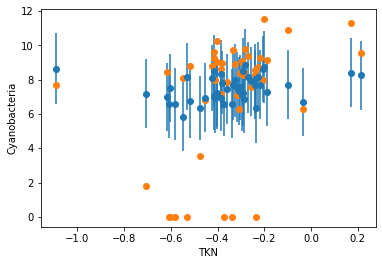

In [84]:
plt.errorbar(x=df_test['TKN'], y=np.asarray(ppc['cyano']).mean(axis=0), yerr=np.asarray(ppc['cyano']).std(axis=0), linestyle='', marker='o')
plt.plot(df_test['TKN'],df_test['Cyano'], 'o')
#plt.ylim(-.05, 1.05)
plt.xlabel('TKN')
plt.ylabel('Cyanobacteria')
plt.savefig('prediction_result.png')

In [92]:
def rmse(predictions, targets): 

    return np.sqrt(((predictions - targets) ** 2).mean())

In [93]:
rmse(pred, true)

20501.699634198914